<a href="https://colab.research.google.com/github/yuma-gri/QM2/blob/main/earnings_2022_qm2_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# data in earnings
df_path_earnings = "https://data.london.gov.uk/download/2z0rk/1686ef1c-b169-442d-8877-e7e49788f668/earnings-residence-borough.xlsx"

earnings_df = pd.read_excel(df_path_earnings, sheet_name="Total, weekly")

In [3]:
import pandas as pd

raw_df = pd.read_excel(df_path_earnings, sheet_name="Total, weekly", header=None)

# Extract the first two rows to be used as header information
header_row0 = raw_df.iloc[0] # Contains years (e.g., 2002, NaN, 2003, NaN)
header_row1 = raw_df.iloc[1] # Contains sub-headers (e.g., Code, Area, Pay (£), conf %)

# Construct new column names by combining the year and sub-header
new_columns = []
current_year = None

for i in range(len(header_row0)):
    year_val = header_row0.iloc[i]
    sub_header_val = header_row1.iloc[i]

    if i < 2: # Handle the first two columns ('Code', 'Area') specifically
        new_columns.append(str(year_val).strip())
    elif pd.isna(year_val): # If year is NaN, it's a sub-header like 'conf %' under a year
        if current_year is not None:
            new_columns.append(f"{current_year} {str(sub_header_val).strip()}")
        else:
            # This case implies a NaN year_val without a preceding year, which shouldn't happen for data columns
            new_columns.append(str(sub_header_val).strip()) # Fallback for safety
    else: # Year value is present (e.g., 2002, 2003, ...)
        current_year = int(year_val)
        new_columns.append(f"{current_year} {str(sub_header_val).strip()}")

# Create the earnings_clean DataFrame by taking data from the third row onwards
# and assigning the newly constructed column names.
earnings_clean = raw_df.iloc[2:].copy()
earnings_clean.columns = new_columns
earnings_clean = earnings_clean.reset_index(drop=True)

# Remove all 'conf %' columns
columns_to_drop = [col for col in earnings_clean.columns if 'conf %' in col]
earnings_clean = earnings_clean.drop(columns=columns_to_drop)

# Identify the columns for 'Pay (£)' for years 2011 to 2024
years_to_keep = list(range(2019, 2023))
pay_columns = [f"{year} Pay (£)" for year in years_to_keep]

# Ensure 'Code' and 'Area' are always kept
final_columns = ['Code', 'Area'] + pay_columns

# Filter earnings_clean to retain only these selected columns
earnings_clean = earnings_clean[final_columns]

earnings_clean_df = earnings_clean.iloc[0:34]

print("Cleaned earnings_clean DataFrame:")
earnings_clean_df

Cleaned earnings_clean DataFrame:


,Code,Area,2019 Pay (£),2020 Pay (£),2021 Pay (£),2022 Pay (£)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,00AA,City of London,#,#,#,#
2,00AB,Barking and Dagenham,471,486.7,508.7,536.6
3,00AC,Barnet,536.4,538.8,574.9,624.3
4,00AD,Bexley,553.4,566.5,586.6,634.4
5,00AE,Brent,524,531.8,555.7,556.6
6,00AF,Bromley,638.3,613.2,666.6,704.2
7,00AG,Camden,662,623,695,699.2
8,00AH,Croydon,561.7,565.1,613.3,667
9,00AJ,Ealing,532.2,566.8,582.6,597.4


In [4]:
earnings_df_2022=earnings_clean_df[["Code", "Area", "2022 Pay (£)"]]
earnings_df_2022

,Code,Area,2022 Pay (£)
0,NaN,NaN,NaN
1,00AA,City of London,#
2,00AB,Barking and Dagenham,536.6
3,00AC,Barnet,624.3
4,00AD,Bexley,634.4
5,00AE,Brent,556.6
6,00AF,Bromley,704.2
7,00AG,Camden,699.2
8,00AH,Croydon,667
9,00AJ,Ealing,597.4


In [5]:
#choropleth 2022 income
#import necessary libraries

import warnings

import geopandas as gpd
import libpysal as lps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import esda

In [6]:
geojson_url = "https://hub.arcgis.com/api/v3/datasets/0a92a355a8094e0eb20a7a66cf4ca7cf_10/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1"
output_filename = "london_boroughs.geojson"

In [7]:
import requests

# Download the GeoJSON file
response = requests.get(geojson_url)
response.raise_for_status()  # Raise an exception for bad status codes

with open(output_filename, 'wb') as f:
    f.write(response.content)

gdf = gpd.read_file(output_filename)

In [8]:
gdf

,BOROUGH,NUMBER_,CODE,HECTARES,DESCRIPT0,X,Y,AREA,OBJECTID,FILE_NAME,Shape__Area,Shape__Length,GlobalID,geometry
0,Bromley,19,00AF,15014.515249,CIVIL ADMINISTRATION AREA,542896,165656,0.0,1,GREATER_LONDON_AUTHORITY,1.501452e+08,75909.142745,86b54395-dc20-4e52-bc8c-7b79188f035f,"POLYGON ((0.01216 51.2996, 0.01199 51.29979, 0..."
1,Lewisham,07,00AZ,3532.340464,CIVIL ADMINISTRATION AREA,537667,174002,0.0,2,GREATER_LONDON_AUTHORITY,3.532340e+07,40992.749346,84f88d72-30c1-47b6-bc71-163246413f0d,"POLYGON ((-0.04613 51.45696, -0.04608 51.45712..."
2,Wandsworth,10,00BJ,3522.003234,CIVIL ADMINISTRATION AREA,526129,174114,0.0,3,GREATER_LONDON_AUTHORITY,3.522003e+07,37353.846507,617038fb-5459-4133-96ae-1743ba48321c,"POLYGON ((-0.25401 51.43724, -0.25219 51.43803..."
3,Merton,22,00BA,3760.919638,CIVIL ADMINISTRATION AREA,525475,169422,0.0,4,GREATER_LONDON_AUTHORITY,3.760920e+07,32293.919848,6362d58b-7052-4655-a812-3487752e770e,"POLYGON ((-0.21811 51.38015, -0.21834 51.38019..."
4,Redbridge,14,00BC,5645.008264,CIVIL ADMINISTRATION AREA,543914,189463,0.0,5,GREATER_LONDON_AUTHORITY,5.645008e+07,45688.184397,3d6ac4f8-be2c-4a89-a684-e50e11c602e9,"POLYGON ((0.02037 51.55627, 0.02009 51.55648, ..."
5,Barnet,30,00AC,8673.726080,CIVIL ADMINISTRATION AREA,524028,192316,0.0,6,GREATER_LONDON_AUTHORITY,8.673726e+07,50866.471778,e424d66c-44fe-4e0e-b58b-d1851cfe71b1,"POLYGON ((-0.19987 51.67017, -0.19968 51.66986..."
6,City of London,00,00AA,315.281290,CIVIL ADMINISTRATION AREA,532464,181220,0.0,7,GREATER_LONDON_AUTHORITY,3.152813e+06,9651.890663,417f3ab6-bfb7-4770-827f-80526d360a25,"POLYGON ((-0.11153 51.51522, -0.11155 51.51529..."
7,Sutton,21,00BF,4385.094979,CIVIL ADMINISTRATION AREA,526976,164132,0.0,8,GREATER_LONDON_AUTHORITY,4.385095e+07,39753.841108,6dfcbe71-9609-488c-8852-df930b685ada,"POLYGON ((-0.14425 51.33991, -0.14424 51.33986..."
8,Southwark,08,00BE,2989.720613,CIVIL ADMINISTRATION AREA,533855,176787,0.0,9,GREATER_LONDON_AUTHORITY,2.989721e+07,33664.416241,161208ac-2edc-471f-81dc-ec7e494032e5,"POLYGON ((-0.0783 51.42051, -0.07827 51.42057,..."
9,Ealing,27,00AJ,5552.780662,CIVIL ADMINISTRATION AREA,515888,181715,0.0,10,GREATER_LONDON_AUTHORITY,5.552781e+07,47268.052132,4d06499b-5d29-43e8-a4fa-c32be7b23119,"POLYGON ((-0.33542 51.49621, -0.33598 51.49622..."


In [9]:
np.random.seed(12345)
import esda

In [10]:
earnings_df_2022_borough = earnings_df_2022.rename(columns={'Area': 'Borough'})

In [11]:
earnings_df_2022_borough = earnings_df_2022_borough.rename(columns={'Code': 'LA_Code'})

In [12]:
#Standardise borough names: inspect the unique values in the 'Borough' column
earnings_df_2022_borough['Borough'].unique()

array([nan, 'City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [13]:
#Inspect the unique values in the 'BOROUGH' column of the gdf DataFrame to compare them with the unique borough names from vehicles_df_2019_borough and identify any inconsistencies.
gdf['BOROUGH'].unique()

array(['Bromley', 'Lewisham', 'Wandsworth', 'Merton', 'Redbridge',
       'Barnet', 'City of London', 'Sutton', 'Southwark', 'Ealing',
       'Brent', 'Croydon', 'Richmond upon Thames', 'Hillingdon',
       'Haringey', 'Kensington & Chelsea', 'Kingston upon Thames',
       'Waltham Forest', 'Barking & Dagenham', 'Newham', 'Enfield',
       'Hammersmith & Fulham', 'Havering', 'Greenwich', 'Hackney',
       'Westminster', 'Camden', 'Tower Hamlets', 'Hounslow', 'Harrow',
       'Bexley', 'Islington', 'Lambeth'], dtype=object)

In [14]:
#edit names where necessary in vehicles df to match gdf
earnings_df_2022_borough['Borough'] = earnings_df_2022_borough['Borough'].replace({
    'Barking and Dagenham': 'Barking & Dagenham',
    'Hammersmith and Fulham': 'Hammersmith & Fulham',
    'Kensington and Chelsea': 'Kensington & Chelsea'
})

print("Unique borough names in earnings_df_2022_borough after standardization:")
print(earnings_df_2022_borough['Borough'].unique())

Unique borough names in earnings_df_2022_borough after standardization:
[nan 'City of London' 'Barking & Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']


In [15]:
#Confirm all naming inconsistencies have been resolved
diff_earnings_not_in_gdf = set(earnings_df_2022_borough['Borough'].unique()) - set(gdf['BOROUGH'].unique())
diff_gdf_not_in_earnings = set(gdf['BOROUGH'].unique()) - set(earnings_df_2022_borough['Borough'].unique())

print("Borough names in earnings_df_2022_boroughh but not in gdf:", diff_earnings_not_in_gdf)
print("Borough names in gdf but not in earnings_df_2022_borough:", diff_gdf_not_in_earnings)

Borough names in earnings_df_2022_boroughh but not in gdf: {nan}
Borough names in gdf but not in earnings_df_2022_borough: set()


In [16]:
#remove nan from earnings df
earnings_df_2022_borough = earnings_df_2022_borough.dropna(subset=['Borough'])

regions_to_remove = [
    'nan'
]

earnings_df_2022_borough = earnings_df_2022_borough[~earnings_df_2022_borough['Borough'].isin(regions_to_remove)]

print("Unique borough names in earnings_df_2022_borough after removal:")
print(earnings_df_2022_borough['Borough'].unique())

Unique borough names in earnings_df_2022_borough after removal:
['City of London' 'Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley'
 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']


In [17]:
#merge the data frames by using left merge (borough names as keys), then remove extra borough column
gdf_merged_2022 = gdf.merge(earnings_df_2022_borough, left_on='BOROUGH', right_on='Borough', how='left')
gdf_merged_2022 = earnings_df_2022_borough.drop(columns=['Borough'])
gdf_merged_2022.head()

,LA_Code,2022 Pay (£)
1,00AA,#
2,00AB,536.6
3,00AC,624.3
4,00AD,634.4
5,00AE,556.6


In [18]:
#Check for missing values in merged '2022 Pay (£)' column of the gdf_merged_2022 DataFrame using the .isnull().sum() method.
gdf_merged_2022['2022 Pay (£)'].isnull().sum()

np.int64(0)

In [19]:
import pandas as pd

# Non-spatial merge between the gdf (GeoDataFrame) and the earnings data (earnings_df_2022_borough DataFrame) to combine the attributes based on borough names. This will create a new GeoDataFrame with the earnings data.
sj_gdf = gdf.merge(
    earnings_df_2022_borough,
    left_on='BOROUGH',
    right_on='Borough',
    how='left'
)

# Convert the '2022 Pay (£)' column to numeric, coercing errors to NaN
sj_gdf['2022 Pay (£)'] = pd.to_numeric(sj_gdf['2022 Pay (£)'], errors='coerce')

# Drop the redundant 'Borough' and 'LA_Code' columns from the merged GeoDataFrame
sj_gdf = sj_gdf.drop(columns=['Borough', 'LA_Code'])

sj_gdf.head()

,BOROUGH,NUMBER_,CODE,HECTARES,DESCRIPT0,X,Y,AREA,OBJECTID,FILE_NAME,Shape__Area,Shape__Length,GlobalID,geometry,2022 Pay (£)
0,Bromley,19,00AF,15014.515249,CIVIL ADMINISTRATION AREA,542896,165656,0.0,1,GREATER_LONDON_AUTHORITY,1.501452e+08,75909.142745,86b54395-dc20-4e52-bc8c-7b79188f035f,"POLYGON ((0.01216 51.2996, 0.01199 51.29979, 0...",704.2
1,Lewisham,07,00AZ,3532.340464,CIVIL ADMINISTRATION AREA,537667,174002,0.0,2,GREATER_LONDON_AUTHORITY,3.532340e+07,40992.749346,84f88d72-30c1-47b6-bc71-163246413f0d,"POLYGON ((-0.04613 51.45696, -0.04608 51.45712...",608.4
2,Wandsworth,10,00BJ,3522.003234,CIVIL ADMINISTRATION AREA,526129,174114,0.0,3,GREATER_LONDON_AUTHORITY,3.522003e+07,37353.846507,617038fb-5459-4133-96ae-1743ba48321c,"POLYGON ((-0.25401 51.43724, -0.25219 51.43803...",835.8
3,Merton,22,00BA,3760.919638,CIVIL ADMINISTRATION AREA,525475,169422,0.0,4,GREATER_LONDON_AUTHORITY,3.760920e+07,32293.919848,6362d58b-7052-4655-a812-3487752e770e,"POLYGON ((-0.21811 51.38015, -0.21834 51.38019...",584.4
4,Redbridge,14,00BC,5645.008264,CIVIL ADMINISTRATION AREA,543914,189463,0.0,5,GREATER_LONDON_AUTHORITY,5.645008e+07,45688.184397,3d6ac4f8-be2c-4a89-a684-e50e11c602e9,"POLYGON ((0.02037 51.55627, 0.02009 51.55648, ...",581.7


In [20]:
#Calculate mean earnings for each borough using the 2022 Pay (£) column and group the results by BOROUGH from the sj_gdf GeoDataFrame, storing the result in mean_earnings_gb
mean_earnings_gb = sj_gdf.groupby('BOROUGH')['2022 Pay (£)'].mean()
mean_earnings_gb.name = '2022 Earnings mean'
mean_earnings_gb

,2022 Earnings mean
BOROUGH,
Barking & Dagenham,536.6
Barnet,624.3
Bexley,634.4
Brent,556.6
Bromley,704.2
Camden,699.2
City of London,NaN
Croydon,667.0
Ealing,597.4


In [21]:
#Merge calculated mean earnings for each borough (mean_earnings_gb) back into the gdf GeoDataFrame. This will associate the earnings data with the geographical features, which is essential for spatial analysis and visualization.
gdf = gdf.merge(mean_earnings_gb, left_on='BOROUGH', right_on='BOROUGH', how='left')
gdf.head()

,BOROUGH,NUMBER_,CODE,HECTARES,DESCRIPT0,X,Y,AREA,OBJECTID,FILE_NAME,Shape__Area,Shape__Length,GlobalID,geometry,2022 Earnings mean
0,Bromley,19,00AF,15014.515249,CIVIL ADMINISTRATION AREA,542896,165656,0.0,1,GREATER_LONDON_AUTHORITY,1.501452e+08,75909.142745,86b54395-dc20-4e52-bc8c-7b79188f035f,"POLYGON ((0.01216 51.2996, 0.01199 51.29979, 0...",704.2
1,Lewisham,07,00AZ,3532.340464,CIVIL ADMINISTRATION AREA,537667,174002,0.0,2,GREATER_LONDON_AUTHORITY,3.532340e+07,40992.749346,84f88d72-30c1-47b6-bc71-163246413f0d,"POLYGON ((-0.04613 51.45696, -0.04608 51.45712...",608.4
2,Wandsworth,10,00BJ,3522.003234,CIVIL ADMINISTRATION AREA,526129,174114,0.0,3,GREATER_LONDON_AUTHORITY,3.522003e+07,37353.846507,617038fb-5459-4133-96ae-1743ba48321c,"POLYGON ((-0.25401 51.43724, -0.25219 51.43803...",835.8
3,Merton,22,00BA,3760.919638,CIVIL ADMINISTRATION AREA,525475,169422,0.0,4,GREATER_LONDON_AUTHORITY,3.760920e+07,32293.919848,6362d58b-7052-4655-a812-3487752e770e,"POLYGON ((-0.21811 51.38015, -0.21834 51.38019...",584.4
4,Redbridge,14,00BC,5645.008264,CIVIL ADMINISTRATION AREA,543914,189463,0.0,5,GREATER_LONDON_AUTHORITY,5.645008e+07,45688.184397,3d6ac4f8-be2c-4a89-a684-e50e11c602e9,"POLYGON ((0.02037 51.55627, 0.02009 51.55648, ...",581.7


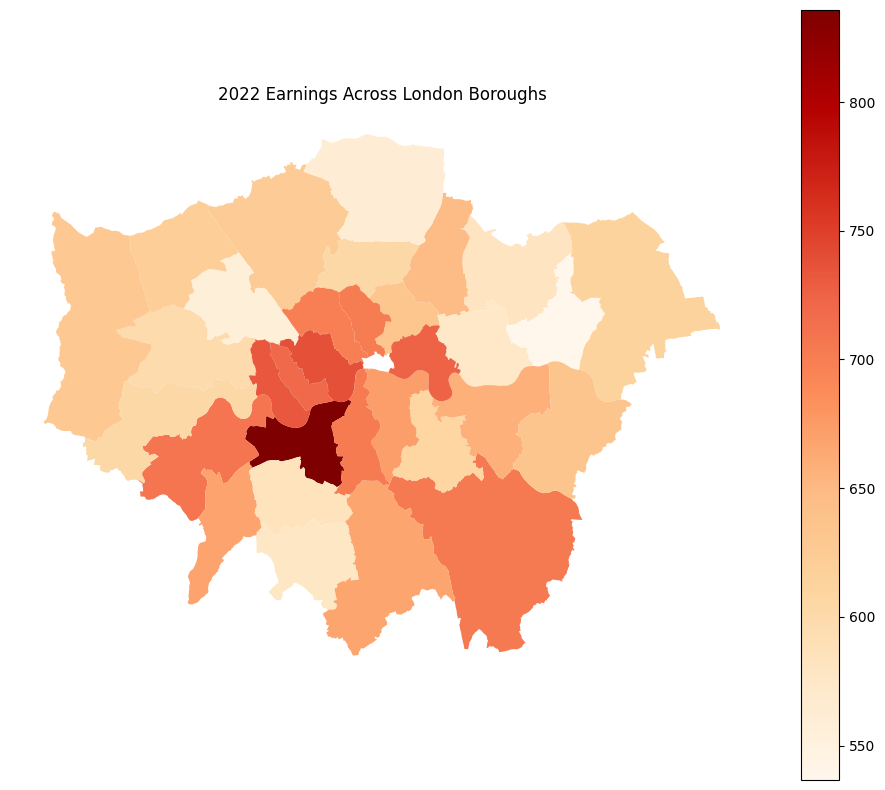

In [22]:
#Create choropleth map using gdf DataFrame, specifying plot size, column mapping, color scheme, legend, axis removal, and title
import matplotlib.pyplot as plt
import mapclassify as mc

fig, ax = plt.subplots(1, figsize=(12, 10), subplot_kw={'aspect': 'equal'})
gdf.plot(column='2022 Earnings mean', cmap='OrRd', legend=True, ax=ax)
ax.set_axis_off()
plt.title('2022 Earnings Across London Boroughs')
plt.show()